In [98]:
models = {
    "NaiveBayesLog": {
        "data_headers": True,
        "model_args":[True],
    },
    "NaiveBayes": {
        "data_headers": True,
        "model_args":[False]
    },
    "LogisticRegression": {
        "data_headers": False,
        "model_args":[10000,0.05,False,1e-2] 
    }
}

In [99]:
def get_split(dataset, train_percentage):
    dataset_copy = dataset
    length = len(dataset_copy)
    train_length = int(train_percentage * length)
    
    # Shuffle it!
    np.random.shuffle(dataset_copy)
    
    train = dataset_copy[:train_length]
    test = dataset_copy[train_length:]
    return {"train": train, "test": test}

In [100]:
def split_test(train_percentage, datasets):
    accuracies = []
    splits = split_datasets(train_percentage, datasets)
    for dataset_name, dataset in splits.items():
        for model_name, model_params in models.items():
            print()
            print("\tFitting {} with {} ".format(dataset_name,model_name))

            if(model_params["data_headers"] == True):
                model = run_fit(splits[dataset_name]["train"],"NaiveBayes", datasets[dataset_name][1], model_params["model_args"])
            else:
                model = run_fit(splits[dataset_name]["train"],"LogisticRegression", [], model_params["model_args"])

            print("\tPredicting {} with {}".format(dataset_name, model_name))
            accuracies.append(run_predict(splits[dataset_name]["test"],model))
            print("\t\tGot accuracy of: {}".format(accuracies[-1]))
    return accuracies

In [101]:
'''
Returns dictionary with key as a feature and the index of all the columns
'''
def separate_by_feature(dataset_headers):
    dataset_headers = dataset_headers[:-1]
#     print(dataset_headers)
    feature_map = {}
    
    for i, feature in enumerate(dataset_headers):
        sep = '_b'
        feature_name = feature.split(sep, 1)[0]
        if feature_name not in feature_map:
            feature_map[feature_name] = [i]
        else:
            feature_map[feature_name].append(i)
    return feature_map

In [102]:
'''
Splits dataset by the indexes received
'''
def dataset_by_feature_only(dataset, columns):
    columns.append(-1)
    return dataset[:,columns]

In [103]:
'''
Splits dataset by each feature + labels
'''
def get_separate_feature_sets(dataset, dataset_headers):
    feature_map = separate_by_feature(dataset_headers)
    sets = {}
    for feature_name, columns in feature_map.items():
        feature_set = []
        feature_set.append(dataset_by_feature_only(dataset, columns))
        
#         print(dataset_headers[columns])
        feature_set.append(dataset_headers[columns])
        
        sets[feature_name] = feature_set
    return sets

In [104]:
def get_split(dataset, train_percentage):
    dataset_copy = dataset
    length = len(dataset_copy)
    train_length = int(train_percentage * length)
    
    # Shuffle it!
    np.random.shuffle(dataset_copy)
    
    train = dataset_copy[:train_length]
    test = dataset_copy[train_length:]
    return {"train": train, "test": test}

In [105]:
'''
Runs a split test on each dataset for each separate feature.
Returns 5 best features for each dataset.
'''
def find_optimal_features(datasets, train_percentage):
    print("Finding 5 best features for each dataset ...")
    
    optimal_features = {}
    
    for dataset_name,dataset in datasets.items():
        print("Splitting by feature for",dataset_name)
        sets = get_separate_feature_sets(dataset[0],dataset[1])
        
        
        # feature_accuracies[feature] = [0.3, 0.44, 0.11] # number for each model
        feature_accuracies = {}
    
    
    
        # each feature set has data and dataheaders. feature is the name of the feature
        for feature, feature_set in sets.items():
            # first get the split!
            splits = get_split(feature_set[0], train_percentage)
            
            # go through each model and add to feature_accuracy counter same as average!
            feature_accuracies[feature] = 0
            
            for model_name, model_params in models.items():
                print("\tFitting for feature: ", feature," with ",model_name)
                if(model_params["data_headers"] == True):
                    model = run_fit(splits["train"],"NaiveBayes", sets[feature][1], model_params["model_args"])
                else:
                    model = run_fit(splits["train"],"LogisticRegression", [], model_params["model_args"])

                print("\tPredicting {} with {}".format(dataset_name, model_name))
                
                accuracy = run_predict(splits["test"],model)
                
                feature_accuracies[feature] += accuracy
                print("\t\tGot accuracy of: {}".format(accuracy))
        
        # now have all the feature accuracies for each, find the best according to average
        top_five_features = sorted(feature_accuracies, key=feature_accuracies.get, reverse=True)[:5]
        print()
        print()
        print('-----------------------------')
        print('TOP FIVE FEATURES FOR ', dataset_name)
        print(top_five_features)
        print('-----------------------------')
        optimal_features[dataset_name] = top_five_features
        
    return optimal_features
        

Finding 5 best features for each dataset ...
Splitting by feature for ionosphere
	Fitting for feature:  a2_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.7735849056603774
	Fitting for feature:  a2_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7830188679245284
	Fitting for feature:  a2_g  with  LogisticRegression


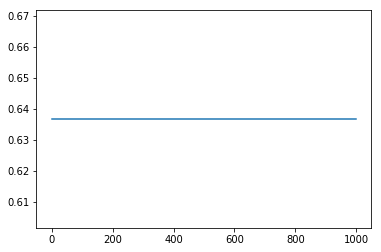

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.7830188679245284
	Fitting for feature:  a3_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.7452830188679245
	Fitting for feature:  a3_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7641509433962265
	Fitting for feature:  a3_g  with  LogisticRegression


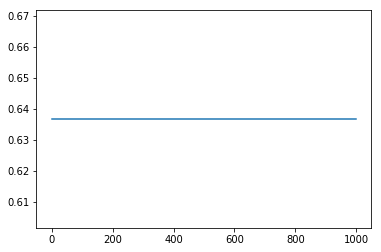

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6509433962264151
	Fitting for feature:  a4_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.8207547169811321
	Fitting for feature:  a4_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.839622641509434
	Fitting for feature:  a4_g  with  LogisticRegression


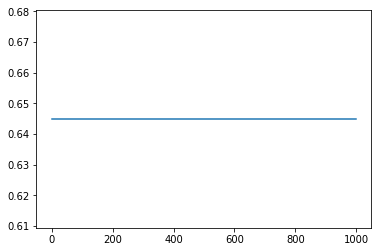

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.839622641509434
	Fitting for feature:  a5_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.6320754716981132
	Fitting for feature:  a5_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7169811320754716
	Fitting for feature:  a5_g  with  LogisticRegression


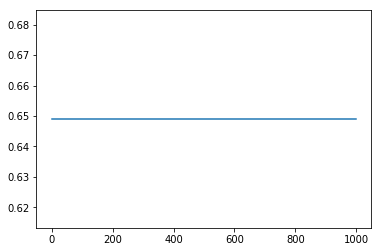

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6698113207547169
	Fitting for feature:  a6_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.839622641509434
	Fitting for feature:  a6_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.8584905660377359
	Fitting for feature:  a6_g  with  LogisticRegression


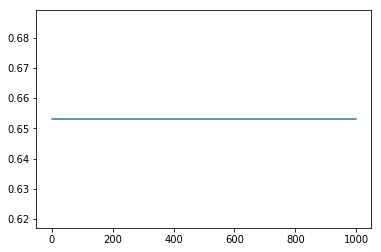

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.8584905660377359
	Fitting for feature:  a7_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.6698113207547169
	Fitting for feature:  a7_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.660377358490566
	Fitting for feature:  a7_g  with  LogisticRegression


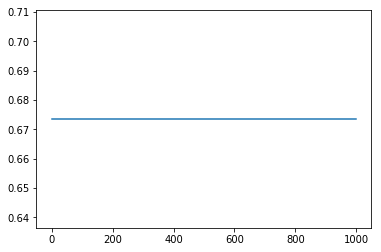

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6509433962264151
	Fitting for feature:  a8_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.7358490566037735
	Fitting for feature:  a8_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7735849056603774
	Fitting for feature:  a8_g  with  LogisticRegression


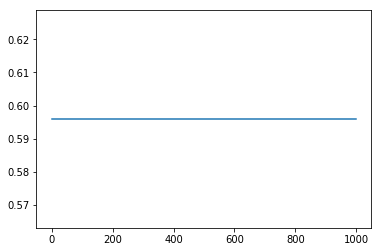

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.7641509433962265
	Fitting for feature:  a9_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.6132075471698113
	Fitting for feature:  a9_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.6698113207547169
	Fitting for feature:  a9_g  with  LogisticRegression


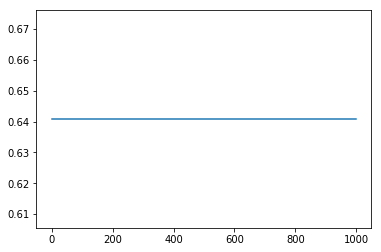

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6698113207547169
	Fitting for feature:  a10_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.5471698113207547
	Fitting for feature:  a10_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.4811320754716981
	Fitting for feature:  a10_g  with  LogisticRegression


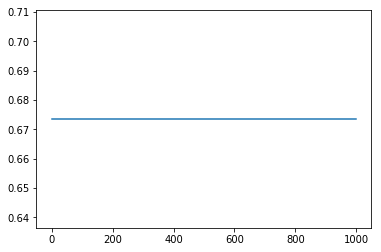

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.5188679245283019
	Fitting for feature:  a11_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.6886792452830188
	Fitting for feature:  a11_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7075471698113207
	Fitting for feature:  a11_g  with  LogisticRegression


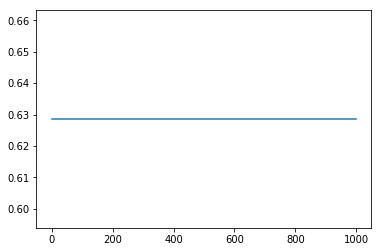

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.7169811320754716
	Fitting for feature:  a12_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.660377358490566
	Fitting for feature:  a12_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.6132075471698113
	Fitting for feature:  a12_g  with  LogisticRegression


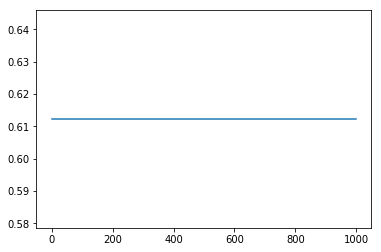

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6132075471698113
	Fitting for feature:  a13_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.6226415094339622
	Fitting for feature:  a13_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7452830188679245
	Fitting for feature:  a13_g  with  LogisticRegression


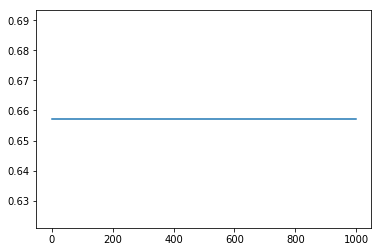

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.7169811320754716
	Fitting for feature:  a14_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.6886792452830188
	Fitting for feature:  a14_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.5566037735849056
	Fitting for feature:  a14_g  with  LogisticRegression


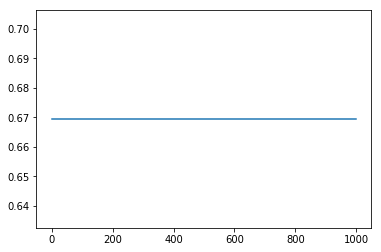

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.5660377358490566
	Fitting for feature:  a15_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.7075471698113207
	Fitting for feature:  a15_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7547169811320755
	Fitting for feature:  a15_g  with  LogisticRegression


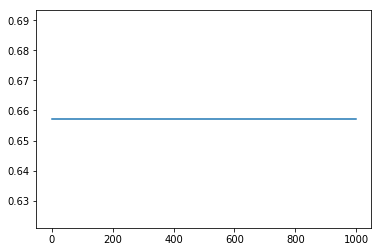

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6037735849056604
	Fitting for feature:  a16_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.660377358490566
	Fitting for feature:  a16_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.6132075471698113
	Fitting for feature:  a16_g  with  LogisticRegression


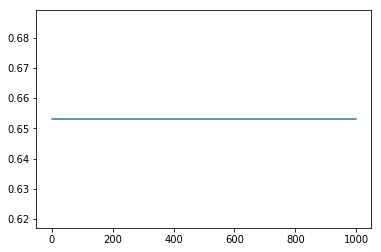

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6132075471698113
	Fitting for feature:  a17_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.6509433962264151
	Fitting for feature:  a17_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7169811320754716
	Fitting for feature:  a17_g  with  LogisticRegression


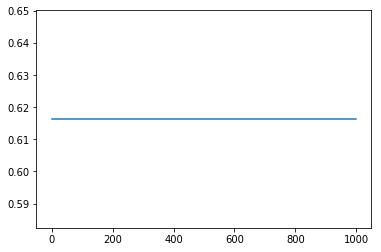

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6981132075471698
	Fitting for feature:  a18_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.6226415094339622
	Fitting for feature:  a18_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.6320754716981132
	Fitting for feature:  a18_g  with  LogisticRegression


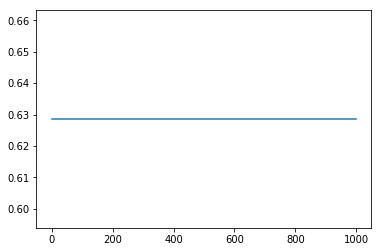

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6698113207547169
	Fitting for feature:  a19_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.6320754716981132
	Fitting for feature:  a19_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7075471698113207
	Fitting for feature:  a19_g  with  LogisticRegression


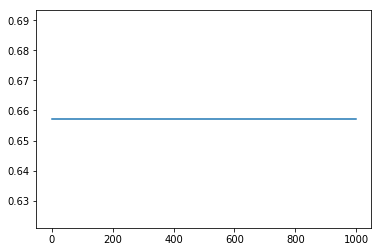

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6037735849056604
	Fitting for feature:  a20_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.7452830188679245
	Fitting for feature:  a20_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.6415094339622641
	Fitting for feature:  a20_g  with  LogisticRegression


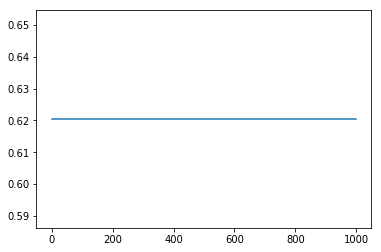

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6415094339622641
	Fitting for feature:  a21_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.6886792452830188
	Fitting for feature:  a21_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.6981132075471698
	Fitting for feature:  a21_g  with  LogisticRegression


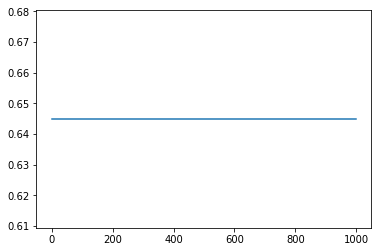

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6320754716981132
	Fitting for feature:  a22_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.6509433962264151
	Fitting for feature:  a22_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.5943396226415094
	Fitting for feature:  a22_g  with  LogisticRegression


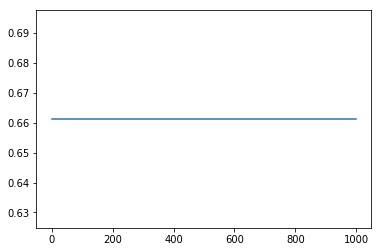

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6320754716981132
	Fitting for feature:  a23_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.6509433962264151
	Fitting for feature:  a23_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7169811320754716
	Fitting for feature:  a23_g  with  LogisticRegression


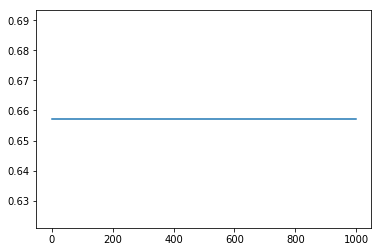

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6037735849056604
	Fitting for feature:  a24_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.7452830188679245
	Fitting for feature:  a24_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.660377358490566
	Fitting for feature:  a24_g  with  LogisticRegression


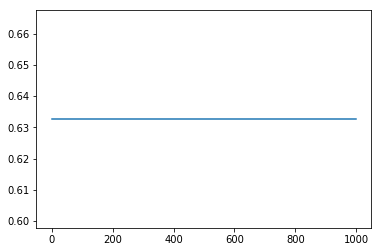

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.7075471698113207
	Fitting for feature:  a25_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.5660377358490566
	Fitting for feature:  a25_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.660377358490566
	Fitting for feature:  a25_g  with  LogisticRegression


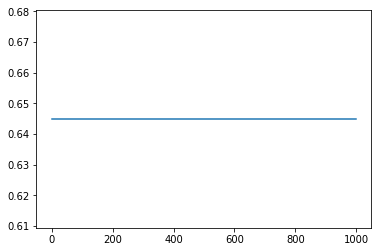

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6320754716981132
	Fitting for feature:  a26_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.7075471698113207
	Fitting for feature:  a26_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.5754716981132075
	Fitting for feature:  a26_g  with  LogisticRegression


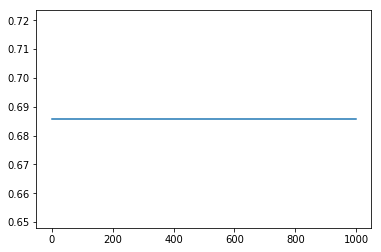

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.5377358490566038
	Fitting for feature:  a27_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.7358490566037735
	Fitting for feature:  a27_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.839622641509434
	Fitting for feature:  a27_g  with  LogisticRegression


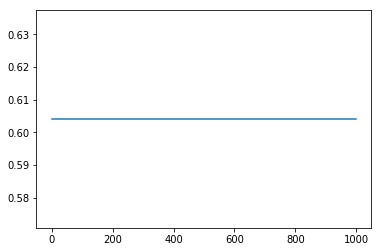

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.7264150943396226
	Fitting for feature:  a28_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.7452830188679245
	Fitting for feature:  a28_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.6792452830188679
	Fitting for feature:  a28_g  with  LogisticRegression


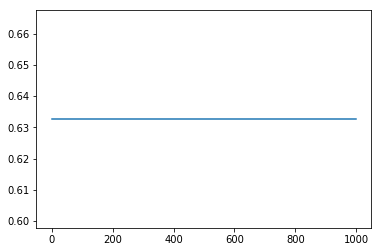

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.660377358490566
	Fitting for feature:  a29_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.660377358490566
	Fitting for feature:  a29_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.6886792452830188
	Fitting for feature:  a29_g  with  LogisticRegression


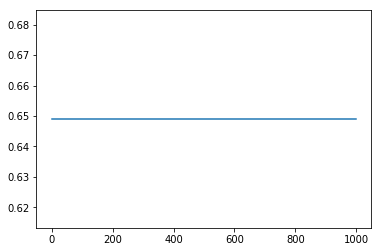

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6226415094339622
	Fitting for feature:  a30_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.7169811320754716
	Fitting for feature:  a30_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.6132075471698113
	Fitting for feature:  a30_g  with  LogisticRegression


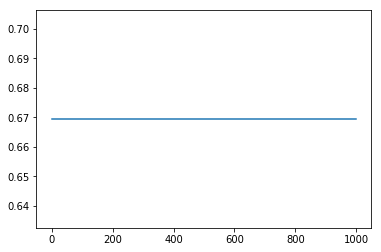

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6132075471698113
	Fitting for feature:  a31_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.6320754716981132
	Fitting for feature:  a31_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7452830188679245
	Fitting for feature:  a31_g  with  LogisticRegression


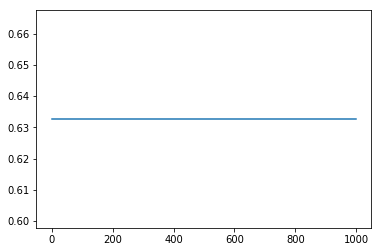

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.660377358490566
	Fitting for feature:  a32_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.7264150943396226
	Fitting for feature:  a32_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.6886792452830188
	Fitting for feature:  a32_g  with  LogisticRegression


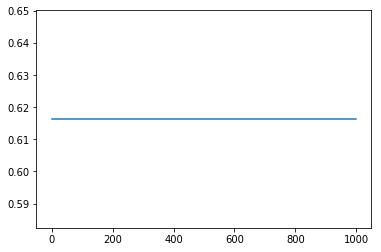

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.6886792452830188
	Fitting for feature:  a33_g  with  NaiveBayes Log Laplace
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.6320754716981132
	Fitting for feature:  a33_g  with  NaiveBayes Without Log Laplace
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7735849056603774
	Fitting for feature:  a33_g  with  LogisticRegression


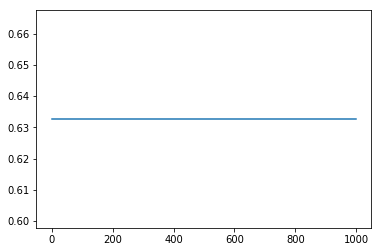

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.660377358490566


-----------------------------
TOP FIVE FEATURES FOR  ionosphere
['a6_g', 'a4_g', 'a2_g', 'a27_g', 'a8_g']
-----------------------------
Splitting by feature for adult
	Fitting for feature:  age_g  with  NaiveBayes Log Laplace
	Predicting adult with NaiveBayes Log Laplace
		Got accuracy of: 0.6030072971180069
	Fitting for feature:  age_g  with  NaiveBayes Without Log Laplace
	Predicting adult with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7521928208152134
	Fitting for feature:  age_g  with  LogisticRegression


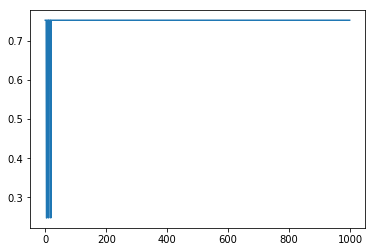

	Predicting adult with LogisticRegression
		Got accuracy of: 0.40259453084690794
	Fitting for feature:  fnlwgt_g  with  NaiveBayes Log Laplace
	Predicting adult with NaiveBayes Log Laplace
		Got accuracy of: 0.39979361686445053
	Fitting for feature:  fnlwgt_g  with  NaiveBayes Without Log Laplace
	Predicting adult with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7474017837399572
	Fitting for feature:  fnlwgt_g  with  LogisticRegression


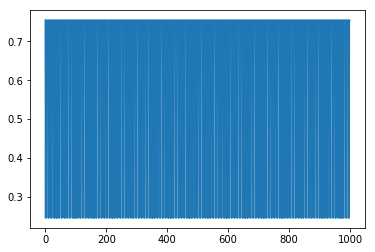

	Predicting adult with LogisticRegression
		Got accuracy of: 0.25259821626004275
	Fitting for feature:  educationnum_g  with  NaiveBayes Log Laplace
	Predicting adult with NaiveBayes Log Laplace
		Got accuracy of: 0.7125377754846318
	Fitting for feature:  educationnum_g  with  NaiveBayes Without Log Laplace
	Predicting adult with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7765902557676716
	Fitting for feature:  educationnum_g  with  LogisticRegression


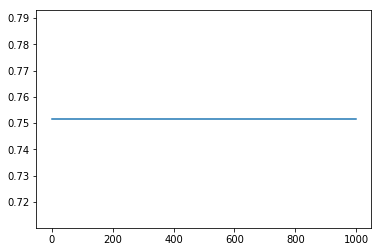

	Predicting adult with LogisticRegression
		Got accuracy of: 0.7765902557676716
	Fitting for feature:  sex  with  NaiveBayes Log Laplace
	Predicting adult with NaiveBayes Log Laplace
		Got accuracy of: 0.4894228643030884
	Fitting for feature:  sex  with  NaiveBayes Without Log Laplace
	Predicting adult with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7541092356453158
	Fitting for feature:  sex  with  LogisticRegression


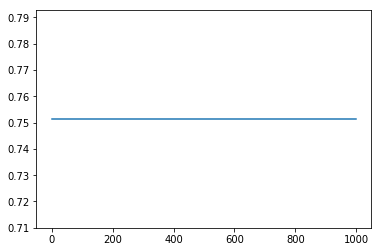

	Predicting adult with LogisticRegression
		Got accuracy of: 0.7541092356453158
	Fitting for feature:  capitalgain_g  with  NaiveBayes Log Laplace
	Predicting adult with NaiveBayes Log Laplace
		Got accuracy of: 0.7786540871231665
	Fitting for feature:  capitalgain_g  with  NaiveBayes Without Log Laplace
	Predicting adult with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7816024176310165
	Fitting for feature:  capitalgain_g  with  LogisticRegression


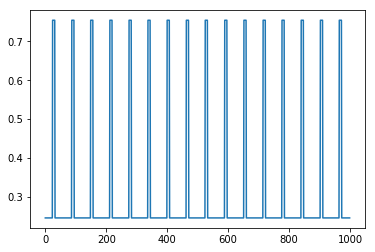

	Predicting adult with LogisticRegression
		Got accuracy of: 0.7712095525908454
	Fitting for feature:  capitalloss_g  with  NaiveBayes Log Laplace
	Predicting adult with NaiveBayes Log Laplace
		Got accuracy of: 0.7530036117048721
	Fitting for feature:  capitalloss_g  with  NaiveBayes Without Log Laplace
	Predicting adult with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7533721530183534
	Fitting for feature:  capitalloss_g  with  LogisticRegression


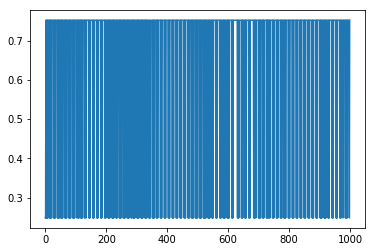

	Predicting adult with LogisticRegression
		Got accuracy of: 0.7524876538659984
	Fitting for feature:  hoursperweek_g  with  NaiveBayes Log Laplace
	Predicting adult with NaiveBayes Log Laplace
		Got accuracy of: 0.6972801651065085
	Fitting for feature:  hoursperweek_g  with  NaiveBayes Without Log Laplace
	Predicting adult with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7513820299255547
	Fitting for feature:  hoursperweek_g  with  LogisticRegression


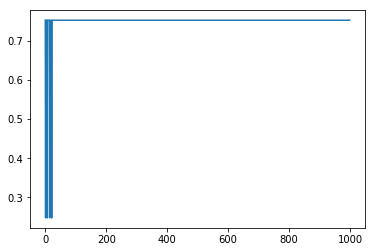

	Predicting adult with LogisticRegression
		Got accuracy of: 0.7342817129800251
	Fitting for feature:  workclass  with  NaiveBayes Log Laplace
	Predicting adult with NaiveBayes Log Laplace
		Got accuracy of: 0.6642588634185892
	Fitting for feature:  workclass  with  NaiveBayes Without Log Laplace
	Predicting adult with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7586791479324833
	Fitting for feature:  workclass  with  LogisticRegression


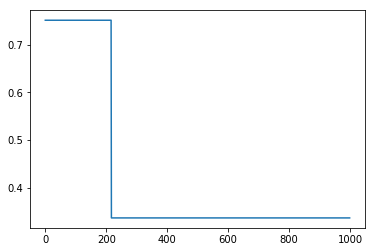

	Predicting adult with LogisticRegression
		Got accuracy of: 0.7586791479324833
	Fitting for feature:  education  with  NaiveBayes Log Laplace
	Predicting adult with NaiveBayes Log Laplace
		Got accuracy of: 0.7115795680695806
	Fitting for feature:  education  with  NaiveBayes Without Log Laplace
	Predicting adult with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7712832608535417
	Fitting for feature:  education  with  LogisticRegression


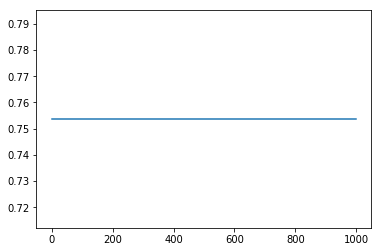

	Predicting adult with LogisticRegression
		Got accuracy of: 0.7712832608535417
	Fitting for feature:  maritalstatus  with  NaiveBayes Log Laplace
	Predicting adult with NaiveBayes Log Laplace
		Got accuracy of: 0.7089260706125157
	Fitting for feature:  maritalstatus  with  NaiveBayes Without Log Laplace
	Predicting adult with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7094420284513894
	Fitting for feature:  maritalstatus  with  LogisticRegression


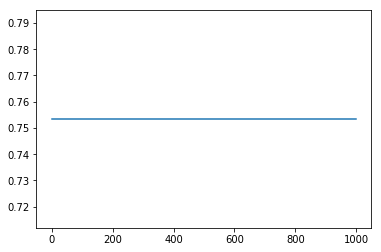

	Predicting adult with LogisticRegression
		Got accuracy of: 0.7493181985700597
	Fitting for feature:  occupation  with  NaiveBayes Log Laplace
	Predicting adult with NaiveBayes Log Laplace
		Got accuracy of: 0.6562983710473944
	Fitting for feature:  occupation  with  NaiveBayes Without Log Laplace
	Predicting adult with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7457802019606398
	Fitting for feature:  occupation  with  LogisticRegression


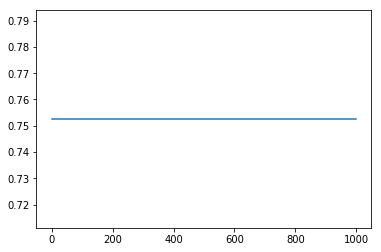

	Predicting adult with LogisticRegression
		Got accuracy of: 0.7513083216628584
	Fitting for feature:  relationship  with  NaiveBayes Log Laplace
	Predicting adult with NaiveBayes Log Laplace
		Got accuracy of: 0.7154861059924817
	Fitting for feature:  relationship  with  NaiveBayes Without Log Laplace
	Predicting adult with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7185818530257242
	Fitting for feature:  relationship  with  LogisticRegression


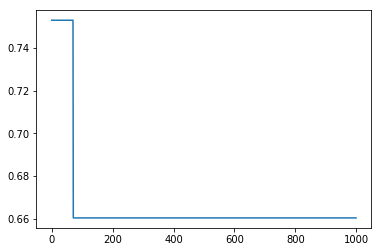

	Predicting adult with LogisticRegression
		Got accuracy of: 0.7504975307731997
	Fitting for feature:  race  with  NaiveBayes Log Laplace
	Predicting adult with NaiveBayes Log Laplace
		Got accuracy of: 0.3394265497162232
	Fitting for feature:  race  with  NaiveBayes Without Log Laplace
	Predicting adult with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7538881108572271
	Fitting for feature:  race  with  LogisticRegression


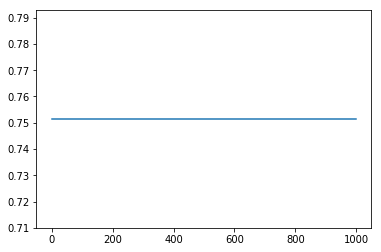

	Predicting adult with LogisticRegression
		Got accuracy of: 0.7538881108572271
	Fitting for feature:  nativecountry  with  NaiveBayes Log Laplace
	Predicting adult with NaiveBayes Log Laplace
		Got accuracy of: 0.29424338468342304
	Fitting for feature:  nativecountry  with  NaiveBayes Without Log Laplace
	Predicting adult with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7488759489938822
	Fitting for feature:  nativecountry  with  LogisticRegression


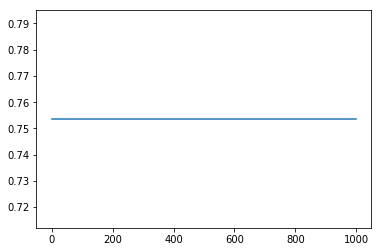

	Predicting adult with LogisticRegression
		Got accuracy of: 0.7488759489938822


-----------------------------
TOP FIVE FEATURES FOR  adult
['capitalgain_g', 'educationnum_g', 'capitalloss_g', 'education', 'relationship']
-----------------------------
Splitting by feature for thoracic_surgery
	Fitting for feature:  dgn_code  with  NaiveBayes Log Laplace
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.6879432624113475
	Fitting for feature:  dgn_code  with  NaiveBayes Without Log Laplace
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.8226950354609929
	Fitting for feature:  dgn_code  with  LogisticRegression


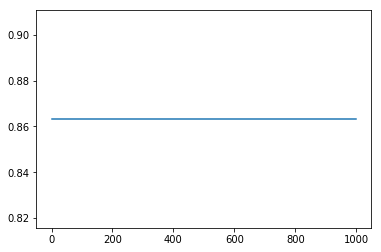

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.8226950354609929
	Fitting for feature:  forced_vital_capacity_g  with  NaiveBayes Log Laplace
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.375886524822695
	Fitting for feature:  forced_vital_capacity_g  with  NaiveBayes Without Log Laplace
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.8794326241134752
	Fitting for feature:  forced_vital_capacity_g  with  LogisticRegression


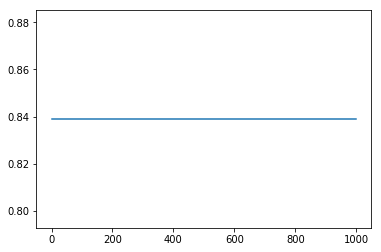

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.8794326241134752
	Fitting for feature:  volume_exhaled_after_fs_forced_expiration_g  with  NaiveBayes Log Laplace
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.1276595744680851
	Fitting for feature:  volume_exhaled_after_fs_forced_expiration_g  with  NaiveBayes Without Log Laplace
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.8865248226950354
	Fitting for feature:  volume_exhaled_after_fs_forced_expiration_g  with  LogisticRegression


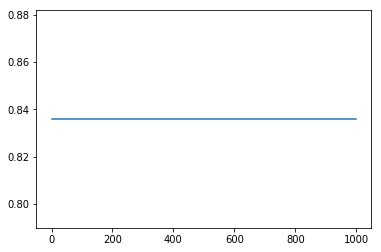

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.8865248226950354
	Fitting for feature:  performance_status  with  NaiveBayes Log Laplace
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.3546099290780142
	Fitting for feature:  performance_status  with  NaiveBayes Without Log Laplace
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.851063829787234
	Fitting for feature:  performance_status  with  LogisticRegression


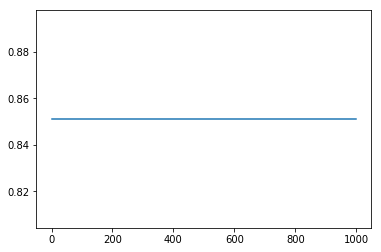

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.851063829787234
	Fitting for feature:  pain  with  NaiveBayes Log Laplace
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.8581560283687943
	Fitting for feature:  pain  with  NaiveBayes Without Log Laplace
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.8581560283687943
	Fitting for feature:  pain  with  LogisticRegression


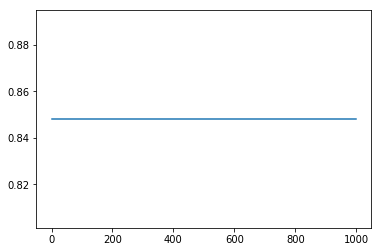

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.8581560283687943
	Fitting for feature:  haemoptysis  with  NaiveBayes Log Laplace
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.7872340425531915
	Fitting for feature:  haemoptysis  with  NaiveBayes Without Log Laplace
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.8581560283687943
	Fitting for feature:  haemoptysis  with  LogisticRegression


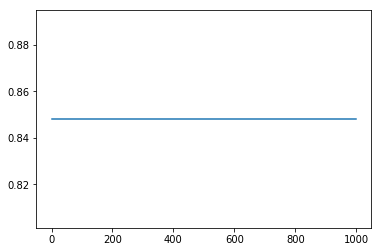

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.8581560283687943
	Fitting for feature:  dyspnoea  with  NaiveBayes Log Laplace
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.8226950354609929
	Fitting for feature:  dyspnoea  with  NaiveBayes Without Log Laplace
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.851063829787234
	Fitting for feature:  dyspnoea  with  LogisticRegression


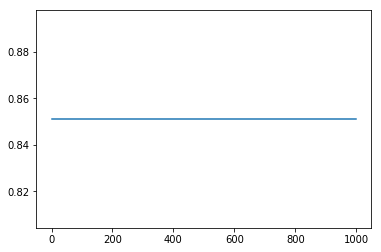

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.851063829787234
	Fitting for feature:  cough  with  NaiveBayes Log Laplace
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.3829787234042553
	Fitting for feature:  cough  with  NaiveBayes Without Log Laplace
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.8652482269503546
	Fitting for feature:  cough  with  LogisticRegression


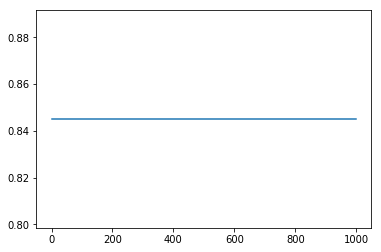

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.8652482269503546
	Fitting for feature:  weakness  with  NaiveBayes Log Laplace
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.7375886524822695
	Fitting for feature:  weakness  with  NaiveBayes Without Log Laplace
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7872340425531915
	Fitting for feature:  weakness  with  LogisticRegression


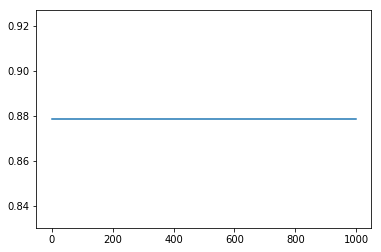

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.7872340425531915
	Fitting for feature:  size_of_original_tumour_g  with  NaiveBayes Log Laplace
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.8297872340425532
	Fitting for feature:  size_of_original_tumour_g  with  NaiveBayes Without Log Laplace
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.8368794326241135
	Fitting for feature:  size_of_original_tumour_g  with  LogisticRegression


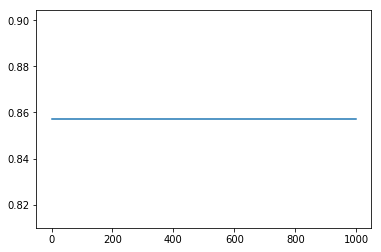

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.8368794326241135
	Fitting for feature:  type_2_diabetes  with  NaiveBayes Log Laplace
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.8368794326241135
	Fitting for feature:  type_2_diabetes  with  NaiveBayes Without Log Laplace
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.851063829787234
	Fitting for feature:  type_2_diabetes  with  LogisticRegression


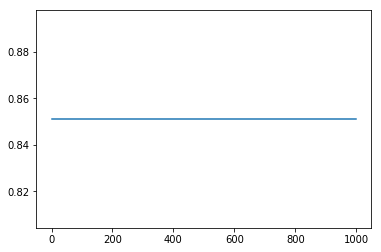

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.851063829787234
	Fitting for feature:  mi_up_to_6_months  with  NaiveBayes Log Laplace
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.8865248226950354
	Fitting for feature:  mi_up_to_6_months  with  NaiveBayes Without Log Laplace
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.8936170212765957
	Fitting for feature:  mi_up_to_6_months  with  LogisticRegression


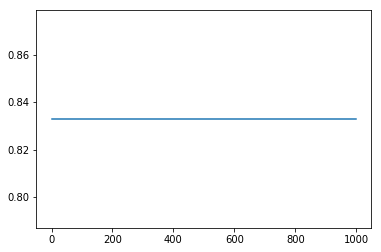

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.8936170212765957
	Fitting for feature:  pad  with  NaiveBayes Log Laplace
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.8014184397163121
	Fitting for feature:  pad  with  NaiveBayes Without Log Laplace
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.8014184397163121
	Fitting for feature:  pad  with  LogisticRegression


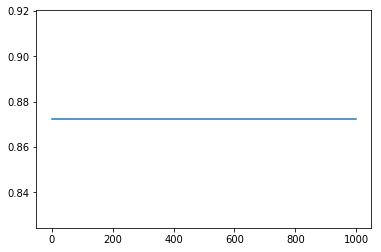

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.8014184397163121
	Fitting for feature:  smoking  with  NaiveBayes Log Laplace
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.3191489361702128
	Fitting for feature:  smoking  with  NaiveBayes Without Log Laplace
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.8226950354609929
	Fitting for feature:  smoking  with  LogisticRegression


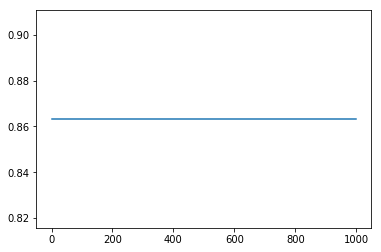

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.8226950354609929
	Fitting for feature:  asthma  with  NaiveBayes Log Laplace
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.8936170212765957
	Fitting for feature:  asthma  with  NaiveBayes Without Log Laplace
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.8936170212765957
	Fitting for feature:  asthma  with  LogisticRegression


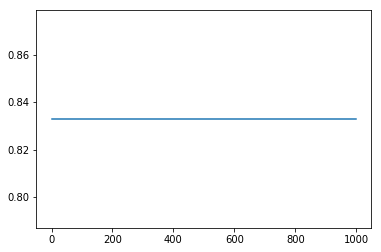

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.8936170212765957
	Fitting for feature:  age_at_surgery_g  with  NaiveBayes Log Laplace
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.40425531914893614
	Fitting for feature:  age_at_surgery_g  with  NaiveBayes Without Log Laplace
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.8156028368794326
	Fitting for feature:  age_at_surgery_g  with  LogisticRegression


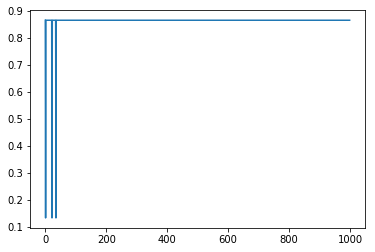

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.8156028368794326


-----------------------------
TOP FIVE FEATURES FOR  thoracic_surgery
['asthma', 'mi_up_to_6_months', 'pain', 'type_2_diabetes', 'dyspnoea']
-----------------------------
Splitting by feature for credit_card
	Fitting for feature:  LIMIT_BAL_g  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.48677777777777775
	Fitting for feature:  LIMIT_BAL_g  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7777777777777778
	Fitting for feature:  LIMIT_BAL_g  with  LogisticRegression


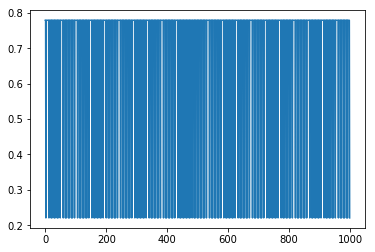

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7777777777777778
	Fitting for feature:  AGE_g  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.6413333333333333
	Fitting for feature:  AGE_g  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7813333333333333
	Fitting for feature:  AGE_g  with  LogisticRegression


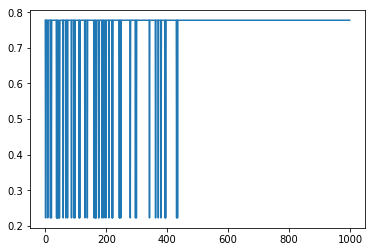

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7814444444444445
	Fitting for feature:  BILL_AMT1_g  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.3477777777777778
	Fitting for feature:  BILL_AMT1_g  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7785555555555556
	Fitting for feature:  BILL_AMT1_g  with  LogisticRegression


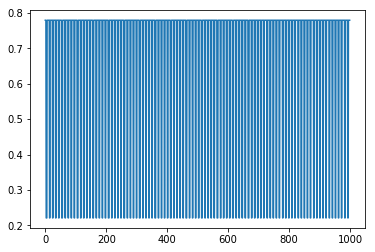

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7684444444444445
	Fitting for feature:  BILL_AMT2_g  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.49366666666666664
	Fitting for feature:  BILL_AMT2_g  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7806666666666666
	Fitting for feature:  BILL_AMT2_g  with  LogisticRegression


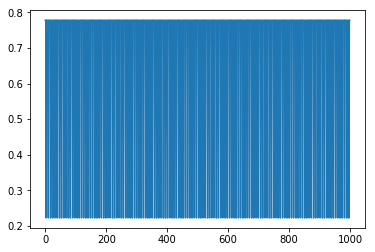

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7671111111111111
	Fitting for feature:  BILL_AMT3_g  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.3383333333333333
	Fitting for feature:  BILL_AMT3_g  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7758888888888889
	Fitting for feature:  BILL_AMT3_g  with  LogisticRegression


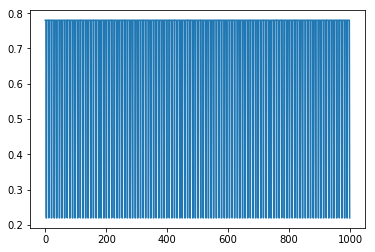

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7668888888888888
	Fitting for feature:  BILL_AMT4_g  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.37433333333333335
	Fitting for feature:  BILL_AMT4_g  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7814444444444445
	Fitting for feature:  BILL_AMT4_g  with  LogisticRegression


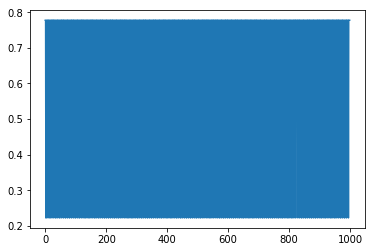

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7666666666666667
	Fitting for feature:  BILL_AMT5_g  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.7164444444444444
	Fitting for feature:  BILL_AMT5_g  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7791111111111111
	Fitting for feature:  BILL_AMT5_g  with  LogisticRegression


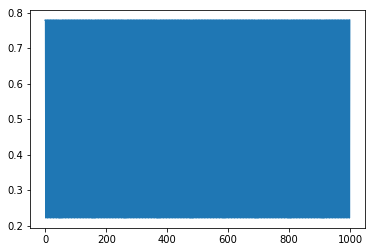

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7681111111111111
	Fitting for feature:  BILL_AMT6_g  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.43777777777777777
	Fitting for feature:  BILL_AMT6_g  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7791111111111111
	Fitting for feature:  BILL_AMT6_g  with  LogisticRegression


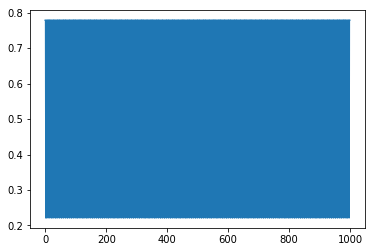

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7642222222222222
	Fitting for feature:  PAY_AMT1_g  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.2748888888888889
	Fitting for feature:  PAY_AMT1_g  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7756666666666666
	Fitting for feature:  PAY_AMT1_g  with  LogisticRegression


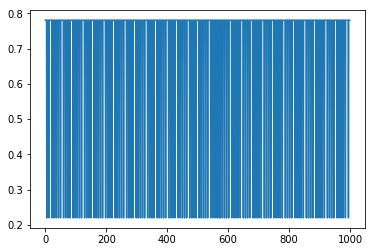

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7286666666666667
	Fitting for feature:  PAY_AMT2_g  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.26
	Fitting for feature:  PAY_AMT2_g  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7796666666666666
	Fitting for feature:  PAY_AMT2_g  with  LogisticRegression


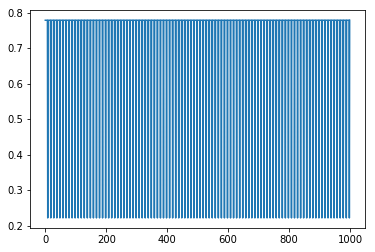

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7182222222222222
	Fitting for feature:  PAY_AMT3_g  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.26411111111111113
	Fitting for feature:  PAY_AMT3_g  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7761111111111111
	Fitting for feature:  PAY_AMT3_g  with  LogisticRegression


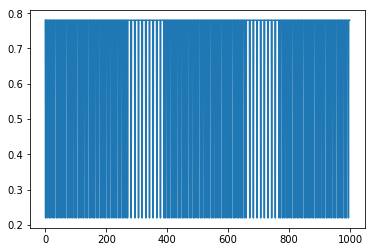

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7058888888888889
	Fitting for feature:  PAY_AMT4_g  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.2658888888888889
	Fitting for feature:  PAY_AMT4_g  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7765555555555556
	Fitting for feature:  PAY_AMT4_g  with  LogisticRegression


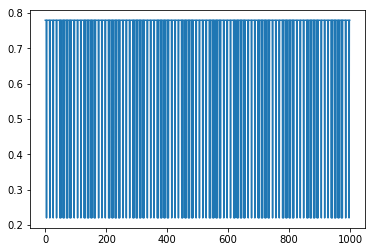

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.22344444444444445
	Fitting for feature:  PAY_AMT5_g  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.27544444444444444
	Fitting for feature:  PAY_AMT5_g  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7714444444444445
	Fitting for feature:  PAY_AMT5_g  with  LogisticRegression


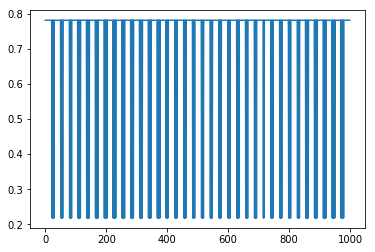

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7714444444444445
	Fitting for feature:  PAY_AMT6_g  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.2618888888888889
	Fitting for feature:  PAY_AMT6_g  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7777777777777778
	Fitting for feature:  PAY_AMT6_g  with  LogisticRegression


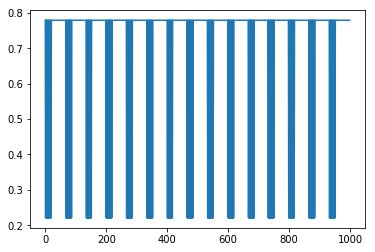

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7777777777777778
	Fitting for feature:  SEX  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.5767777777777777
	Fitting for feature:  SEX  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7802222222222223
	Fitting for feature:  SEX  with  LogisticRegression


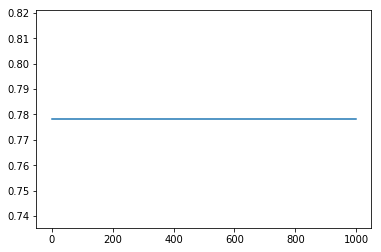

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7802222222222223
	Fitting for feature:  EDUCATION  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.446
	Fitting for feature:  EDUCATION  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7816666666666666
	Fitting for feature:  EDUCATION  with  LogisticRegression


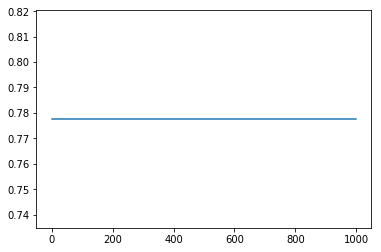

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7816666666666666
	Fitting for feature:  MARRIAGE  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.5322222222222223
	Fitting for feature:  MARRIAGE  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.782
	Fitting for feature:  MARRIAGE  with  LogisticRegression


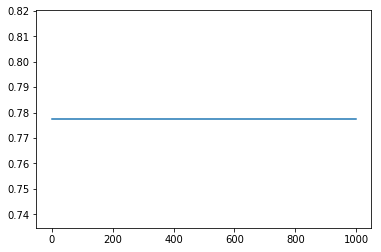

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.782
	Fitting for feature:  PAY_0  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.7836666666666666
	Fitting for feature:  PAY_0  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.8238888888888889
	Fitting for feature:  PAY_0  with  LogisticRegression


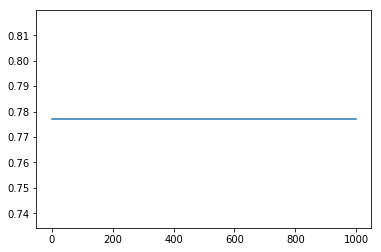

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.823
	Fitting for feature:  PAY_2  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.7971111111111111
	Fitting for feature:  PAY_2  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7971111111111111
	Fitting for feature:  PAY_2  with  LogisticRegression


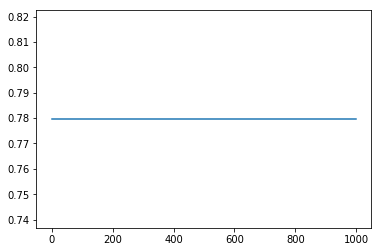

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7964444444444444
	Fitting for feature:  PAY_3  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.7885555555555556
	Fitting for feature:  PAY_3  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7881111111111111
	Fitting for feature:  PAY_3  with  LogisticRegression


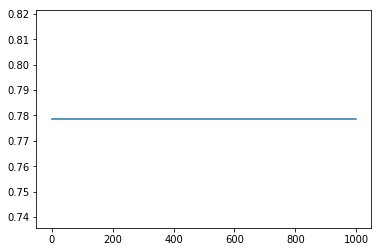

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7874444444444444
	Fitting for feature:  PAY_4  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.7862222222222223
	Fitting for feature:  PAY_4  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7861111111111111
	Fitting for feature:  PAY_4  with  LogisticRegression


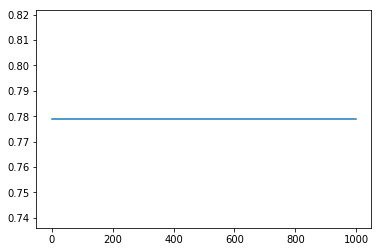

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.782
	Fitting for feature:  PAY_5  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.7966666666666666
	Fitting for feature:  PAY_5  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7966666666666666
	Fitting for feature:  PAY_5  with  LogisticRegression


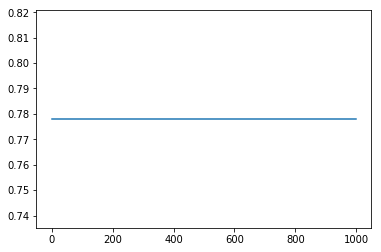

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7947777777777778
	Fitting for feature:  PAY_6  with  NaiveBayes Log Laplace
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.7793333333333333
	Fitting for feature:  PAY_6  with  NaiveBayes Without Log Laplace
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7793333333333333
	Fitting for feature:  PAY_6  with  LogisticRegression


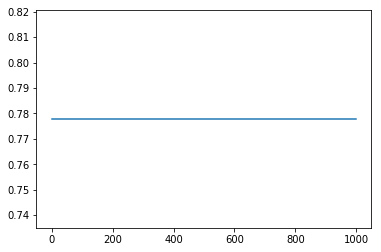

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.7776666666666666


-----------------------------
TOP FIVE FEATURES FOR  credit_card
['PAY_0', 'PAY_2', 'PAY_5', 'PAY_3', 'PAY_4']
-----------------------------


{'ionosphere': ['a6_g', 'a4_g', 'a2_g', 'a27_g', 'a8_g'],
 'adult': ['capitalgain_g',
  'educationnum_g',
  'capitalloss_g',
  'education',
  'relationship'],
 'thoracic_surgery': ['asthma',
  'mi_up_to_6_months',
  'pain',
  'type_2_diabetes',
  'dyspnoea'],
 'credit_card': ['PAY_0', 'PAY_2', 'PAY_5', 'PAY_3', 'PAY_4']}

In [106]:
find_optimal_features(datasets,0.7)

In [115]:
best_features = {
    'ionosphere': ['a6_g', 'a4_g', 'a2_g', 'a27_g', 'a8_g'],
 'adult': ['capitalgain_g',
  'educationnum_g',
  'capitalloss_g',
  'education',
  'relationship'],
 'thoracic_surgery': ['asthma',
  'mi_up_to_6_months',
  'pain',
  'type_2_diabetes',
  'dyspnoea'],
 'credit_card': ['PAY_0', 'PAY_2', 'PAY_5', 'PAY_3', 'PAY_4']
}

In [133]:
def run_split_on_best_features(optimal_features_map, split):
    results = {}
    for dataset,features in optimal_features_map.items():
        results[dataset] = {}
        # Get all the appropriate columns for each feature
        feature_map = separate_by_feature(datasets[dataset][1])
        
        
        columns_to_get = []
        for feature in features:
            columns_to_get = columns_to_get + feature_map[feature]
        
        optimal_headers = datasets[dataset][1][columns_to_get]
        
        results[dataset]['features'] = optimal_headers
        dataset_to_run_on = dataset_by_feature_only(datasets[dataset][0], columns_to_get)
        
        
        splits = get_split(dataset_to_run_on, split)
        
        results[dataset]['results'] = {}
        
        
        for model_name, model_params in models.items():
            print("\tFitting with optimal features: ", dataset)
            if(model_params["data_headers"] == True):
                model = run_fit(splits["train"],"NaiveBayes", optimal_headers, model_params["model_args"])
            else:
                model = run_fit(splits["train"],"LogisticRegression", [], model_params["model_args"])

            print("\tPredicting {} with {}".format(dataset, model_name))

            accuracy = run_predict(splits["test"],model)
            results[dataset]['results'][model_name] = accuracy
            print("\t\tGot accuracy of: {}".format(accuracy))
    return results
        

	Fitting with optimal features:  ionosphere
	Predicting ionosphere with NaiveBayes Log Laplace
		Got accuracy of: 0.839622641509434
	Fitting with optimal features:  ionosphere
	Predicting ionosphere with NaiveBayes Without Log Laplace
		Got accuracy of: 0.839622641509434
	Fitting with optimal features:  ionosphere


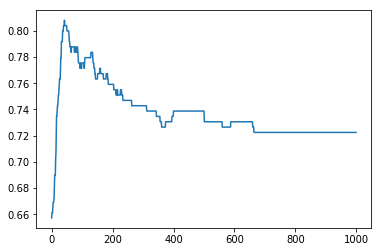

	Predicting ionosphere with LogisticRegression
		Got accuracy of: 0.7924528301886793
	Fitting with optimal features:  adult
	Predicting adult with NaiveBayes Log Laplace
		Got accuracy of: 0.811749097073782
	Fitting with optimal features:  adult
	Predicting adult with NaiveBayes Without Log Laplace
		Got accuracy of: 0.8050416451684234
	Fitting with optimal features:  adult


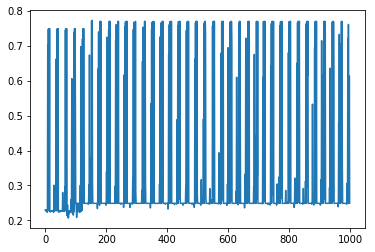

	Predicting adult with LogisticRegression
		Got accuracy of: 0.8107171813960345
	Fitting with optimal features:  thoracic_surgery
	Predicting thoracic_surgery with NaiveBayes Log Laplace
		Got accuracy of: 0.7730496453900709
	Fitting with optimal features:  thoracic_surgery
	Predicting thoracic_surgery with NaiveBayes Without Log Laplace
		Got accuracy of: 0.8581560283687943
	Fitting with optimal features:  thoracic_surgery


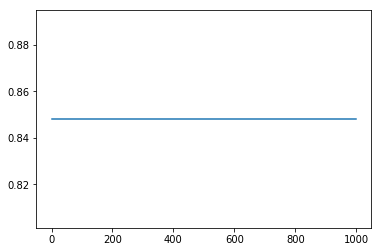

	Predicting thoracic_surgery with LogisticRegression
		Got accuracy of: 0.8581560283687943
	Fitting with optimal features:  credit_card
	Predicting credit_card with NaiveBayes Log Laplace
		Got accuracy of: 0.7807777777777778
	Fitting with optimal features:  credit_card
	Predicting credit_card with NaiveBayes Without Log Laplace
		Got accuracy of: 0.7895555555555556
	Fitting with optimal features:  credit_card


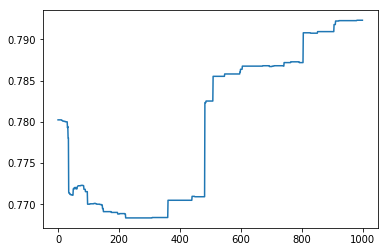

	Predicting credit_card with LogisticRegression
		Got accuracy of: 0.817


{'ionosphere': {'features': array(['a6_g', 'a4_g', 'a2_g', 'a27_g', 'a8_g'], dtype=object),
  'results': {'NaiveBayes Log Laplace': 0.839622641509434,
   'NaiveBayes Without Log Laplace': 0.839622641509434,
   'LogisticRegression': 0.7924528301886793}},
 'adult': {'features': array(['capitalgain_g', 'educationnum_g', 'capitalloss_g',
         'education_b_ 10th', 'education_b_ 11th', 'education_b_ 12th',
         'education_b_ 1st-4th', 'education_b_ 5th-6th',
         'education_b_ 7th-8th', 'education_b_ 9th',
         'education_b_ Assoc-acdm', 'education_b_ Assoc-voc',
         'education_b_ Bachelors', 'education_b_ Doctorate',
         'education_b_ HS-grad', 'education_b_ Masters',
         'education_b_ Preschool', 'education_b_ Prof-school',
         'education_b_ Some-college', 'relationship_b_ Husband',
         'relationship_b_ Not-in-family', 'relationship_b_ Other-relative',
         'relationship_b_ Own-child', 'relationship_b_ Unmarried',
         'relationship_b_ Wife'

In [134]:
run_split_on_best_features(best_features,0.7)